## Michaela Allen $-$ PHYS 513: Homework 2

1. Newman 5.3: Consider the integral: $$ E(x) = \int_{0}^{x} e^{-t^2} dt$$ <br>
<br>
$a)$ Write a program to calculate $E(x)$ for values of $x$ from $0$ to $3$ in steps of $0.1$. Choose for yourself what method you will use for performing the integral and a suitable number of slices. <br>
<br>
$b)$ When you are convinced your program is working, extend it further to make a graph of $E(x)$ as a function of $x$. If you want to remind yourself of how to make a graph, you should consult Section 3.1, starting on page 88. <br>
<br>
Note that there is no known way to perform this particular integral analytically, so numerical approaches are the only way forward.

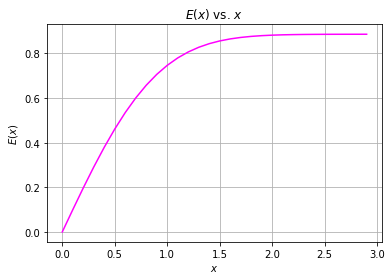

In [3]:
# 1: Newman 5.3 --- Calculating and plotting E(x) using the trapezoidal rule

# necessary imports:

import numpy as np
import matplotlib.pyplot as plt

# define function that is the integrand:

def f(t):
    return np.exp(-t**2)

# define our range of x values:

x = np.arange(0, 3, 0.1)

# define function to calculate E(x) values:

def E(x):
    N = 10000 # number of slices
    a = 0.0
    b = x
    h = (b-a) / N # slice width

    s = (0.5 * f(a)) + (0.5 * f(b))

    for i in range(1, N):
        s += f(a + i * h)

    return s*h # values of E(x)

# plot x vs E(x):

plt.plot(x, E(x), '-', color='magenta')
plt.title('$E(x)$ vs. $x$')
plt.xlabel('$x$')
plt.ylabel('$E(x)$')
plt.grid()
plt.show()

---

2. Nemman 5.5: Error on Simpson's Rule $-$ Derivation, on paper!

---

3. Newman 5.6: Write a program, or modify an earlier one, to once more calculate the value of the integral $\int_{0}^{2} (x^4 - 2x + 1) dx$ from Example 5.1, using the trapezoidal rule with 20 slices, but this time have the program also print an estimate of the error on the result, calculated using the method of Eq. (5.28). To do this you will need to evaluate the integral twice, once with $N_1 = 10$ slices and then again with $N_2 = 20$ slices. Then Eq. (5.28) gives the error. How does the error calculated in this manner compare with a direct computation of the error as the difference between your values for the integral and the true value of 4.4? Why do the two not agree perfectly?

In [4]:
# 3: Newman 5.6 --- Calculate value of integral using the trapezoidal rule and print estimate of error

# necessary imports:

import numpy as np

# define function that is the integrand:

def f(x):
    return x**4 - 2*x + 1

# define variables and calculate value of integral for N = 10 slices:

N1 = 10 # number of slices for first iteration
a = 0.0
b = 2.0
h = (b-a) / N1 # width of slices

s = 0.5*f(a) + 0.5*f(b)

for i in range(1, N1):
    s += f(a + i * h)

I1 = s*h # value of integral for N = 10 slices

print('Value of integral after N = 10 slices =', I1)

# define variables and calculate value of integral for N = 20 slices:

N2 = 20 # number of slices for the second iteration
a2 = 0.0
b2 = 2.0
h2 = (b2-a2) / N2

s2 = 0.5*f(a2) + 0.5*f(b2)

for i in range(1, N2):
    s2 += f(a2 + i * h2)
    
I2 = s2*h2 # value of integral for N = 20 slices

print('Value of integral after N = 20 slices =', I2)

# calculate estimate of error:

one_third = 1./3.

error = one_third * (I2 - I1)

print('Estimate of the error =', abs(error))

print('I1 - I2 =', I1-I2)

print(I2+error, I2-(I1-I2))

Value of integral after N = 10 slices = 4.50656
Value of integral after N = 20 slices = 4.426660000000001
Estimate of the error = 0.026633333333333137
I1 - I2 = 0.07989999999999942
4.400026666666668 4.3467600000000015


---

4. Newman 5.7: Consider the integral: $$I = \int_{0}^{1} sin^2 \sqrt{100x} dx $$ <br>
<br>
$a)$ Write a program that uses the adaptive trapezoidal rule method of Section 5.3 and Eq. (5.34) to calculate the value of this integral to an approximate accuracy of $\epsilon = 10^-6$ (i.e., correct to six digits after the decimal point). Start with one single integration slice and work up from there to two, four, eight, and so forth. Have your program print out the number of slices, its estimate of the integral, and its estimate of the error on the integral, for each value of the number of slices $N$, until the target accuracy is reached. (Hint: You should find the result is around $I = 0.45$.) <br>
Equation 5.34: $$ I_i = \frac{1}{2}I_{i-1} + h_i \sum_{k odd} f(a+kh_i) $$.
<br>
$b)$ Now modify your program to evaluate the same integral using the Romberg integration technique described in this section. Have your program print out a triangular table of values, as on page 161, of all the Romberg estimates of the integral. Calculate the error on your estimates using Eq. (5.49) and again continue the calculation until you reach an accurace of $\epsilon = 10^-6$. You should find that the Romberg method reaches the required accuracy considerable faster than the trapezoidal rule alone.

In [5]:
# 4: Newman 5.7 --- a) adaptive trapezoidal rule

# necessary imports:

import numpy as np

# define one third:

one_third = 1./3.

# define function that is the integrand:

def f(x):
    return (np.sin(np.sqrt(100*x)))**2

# define function that is the adaptive trapezoidal rule:

def atr(f, a, b, N, I_minus_one, error): # atr for adaptive trapezoidal rule
    
    N = 2*N
    h = (b - a) / N
    I = (0.5 * I_minus_one) + h * sum(list(map(f, np.arange(a + h, b, 2*h)))) # equation 5.34
    print('I =', I)
    
    # now define the error for the atr, epsilon:
    
    epsilon = one_third * (I - I_minus_one)
    
    for i in range(N):
        if (abs(epsilon) < error):
            print('Number of slices at desired accuracy =', N, '\n')
            print('Error for the adaptive trapezoidal rule = ', epsilon)
            return I
        else:
            print('Number of slices =', N, '\n')
            return atr(f, a, b, N, I, error)
        
# now set our values in the function and calculate value of I:
        
a = 0
b = 1
N = 1
I_minus_one = 0.5*(f(1)-f(0))
error = 1e-6

print('Value of I at desired accuracy =', atr(f, a, b, N, I_minus_one, error))

I = 0.3252319078064746
Number of slices = 2 

I = 0.5122828507233315
Number of slices = 4 

I = 0.4029974484782483
Number of slices = 8 

I = 0.43010336929474696
Number of slices = 16 

I = 0.4484146657874699
Number of slices = 32 

I = 0.4539129312153758
Number of slices = 64 

I = 0.45534850437280205
Number of slices = 128 

I = 0.455711266453241
Number of slices = 256 

I = 0.455802199651664
Number of slices = 512 

I = 0.45582494813241997
Number of slices = 1024 

I = 0.4558306362016466
Number of slices = 2048 

I = 0.455832058278271
Number of slices at desired accuracy = 4096 

Error for the adaptive trapezoidal rule =  4.7402554146739695e-07
Value of I at desired accuracy = 0.455832058278271


In [6]:
# 4: Newman 5.7 --- b) romberg integration

# constants:

m = 1
a = 0
b = 1
epsilon = 1e-6

# calculate first two estimates of integral using regular trapezoidal rule:

def tr(N, a, b): # define function that is trapezoidal rule:

    h = (b-a) / N 

    s = 0.5*f(a) + 0.5*f(b)
    
    for k in range(1,N):
        s += f(a+k*h)
    
    return h*s

# create an empty array to append values into:

vals = [[]]

N = 1 # first estimate
R11 = tr(N, a, b) # I1, R11 name from textbook
vals[0].append(R11)

N = N * 2 # second estimate
R21 = tr(N, a, b) #I2, R21 name from textbook
vals.append([R21])

def error(R_im, R_i_minus_1_m, m):
    return (1 / (4**m -1)) * (R_im - R_i_minus_1_m)

R21_error = error(R21, R11, 1)
if abs(R21_error) < epsilon: 
    for i in result:
        print(i)

# now calculate more accurate estimate (called R22) using Eq. 5.51:

def romberg(R_im, R_i_m_minus_one, m):
    
    return R_im + (1 / ((4**m) - 1)) * (R_im - R_i_m_minus_one)

R22 = romberg(R21, R11, 1)
vals[1].append(R22)

# now keep calculating values until we reach desire accuracy:

for i in range(2, 10): # we have already calculate i = 2 R_im values, so we can start at i = 3
    N = N * 2
    I_vals = tr(N, a, b) # the I3, I4... etc. values
    vals.append([I_vals])
    
    for j in range(1, i+1):
        currenterror = error(vals[i][j-1], vals[i-1][j-1], j)
        nextromberg = romberg(vals[i][j-1], vals[i-1][j-1], j)
        vals[i].append(nextromberg)
        
    if abs(currenterror) < epsilon:
        print('The estimate of integral =', vals[-1][-1], 'at N =', j+1, 'slices', '\n')
        print("Romberg Table:", '\n')
        
        for i in vals:
            print(i)
        break

The estimate of integral = 0.4558324944613789 at N = 7 slices 

Romberg Table: 

[0.14797948454665205]
[0.3252319078064746, 0.38431604889308213]
[0.5122828507233315, 0.5746331650289505, 0.5873209727713417]
[0.40299744847824825, 0.3665689810632205, 0.35269803546550516, 0.34897386185747603]
[0.43010336929474696, 0.4391386762335799, 0.44397665591160385, 0.4454255229028118, 0.4458037647108327]
[0.4484146657874698, 0.4545184312850441, 0.45554374828847505, 0.45572735292937777, 0.4557677522628153, 0.4557774922310968]
[0.45391293121537596, 0.4557456863580113, 0.4558275033628758, 0.45583200741167584, 0.4558324178214103, 0.45583248103310003, 0.4558324944613789]


---

5. Newman 5.8: Write a program that uses the adaptive Simpson's rule method of Section 5.3 and Eqs. (5.35) to (5.39) to calculate the same integral as in Exercise 5.7, again to an approximate accuracy of $\epsilon = 10^-6$. Starting this time with two integration slices, work up from there to four, eight, and so forth, printing out the results at each step until the required accuracy is reached. You should find you reach that accuracy for a significantly smaller number of slices than with the trapezoidal rule calculation in part (a) of Exercise 5.7, but a somewhat larger number than with the Romberg integration of part (b).

In [7]:
# 5: Newman 5.8

# necessary imports:

import numpy as np

# define function that is the integrand:

def integrand(x):
    return (np.sin(np.sqrt(100*x)))**2

# necessary variables:

one_third = 1./3
two_thirds = 2./3.

N = 1
a = 0
b = 1
h = (b - a) / N
k = 0
epsilon = 1e-6 # target accuracy
error = 1.0

# now calculate sums S1 and T1 (pg. 158) --- need functions to calculate even/odd summations:

def odd_sum(N, a, f, h):
    os = 0.0 # initialize odd sum to zero
    for i in range(1, N, 2):
        os += f(a + k * h)
    return os

def even_sum(N, a, f, h):
    es = 0.0 # initialize even sum to zero
    for i in range(2, N-1, 2):
        es += f(a + k * h)
    return es

# create empty sets to put values into:

S_vals = np.empty(100)
T_vals = np.empty(100)
I_vals = np.empty(100)

# calculate S1, T1, and I1 (pg 158):

S_vals[0] = (one_third) * (integrand(a) + integrand(b) + 2 * even_sum(N, a, integrand, h))
T_vals[0] = (two_thirds) * odd_sum(N, a, integrand, h)
I_vals[0] = h * (S_vals[0] + 2 * T_vals[0])

# loop to calculate until we reach desired accuracy:

niter = 100

for k in range(niter):
    
        N = N * 2
        h = (b - a) / N # have to recalculate h here for each new N
        k += 1
    
        S_vals[k] = S_vals[k - 1] + T_vals[k - 1] # Eq. 5.38
        T_vals[k] = (two_thirds) * odd_sum(N, a, integrand, h)
        I_vals[k] = h * (S_vals[k] + 2 * T_vals[k])
    
        error = np.abs(I_vals[k] - I_vals[k - 1]) / 15
        
        if error > epsilon:
    
            print('Estimation of Integral =', I_vals[k], 'where the number of slices, N =', N)

### Okay, I know something is obviously wrong as none of the estimated values of the integral below are even close
### to what I should get (and my loop won't stop). I've been stuck on this problem for too many days, so I think 
### it's come to the point to give up on it momentarily and have someone else see if they can find where it's wrong 
### (lucky you!).

Estimation of Integral = 0.38431604889308213 where the number of slices, N = 2
Estimation of Integral = 0.44340018997968966 where the number of slices, N = 4
Estimation of Integral = 0.15476137299918452 where the number of slices, N = 8
Estimation of Integral = 0.686202362894979 where the number of slices, N = 16
Estimation of Integral = 0.5404083778225377 where the number of slices, N = 32
Estimation of Integral = 0.18679239283380827 where the number of slices, N = 64
Estimation of Integral = 0.43744224993603575 where the number of slices, N = 128
Estimation of Integral = 0.7735797867597095 where the number of slices, N = 256
Estimation of Integral = 0.853959620885744 where the number of slices, N = 512
Estimation of Integral = 0.7349815243768436 where the number of slices, N = 1024
Estimation of Integral = 0.5496583851822396 where the number of slices, N = 2048
Estimation of Integral = 0.37720190275397114 where the number of slices, N = 4096
Estimation of Integral = 0.244673914646818

KeyboardInterrupt: 

---

6. Newman 5.9: Heat capacity of a solid <br>
$a)$ Write a Python function `cv(T)` that calculates $C_v$ for a given value of the temperature, for a sample consisting of 1000 cubic centimeters of solid aluminum, which has a number density of $\rho = 6.022 \times 10^{28} m^{-3}$ and a Debye temperature of $\theta_D = 428 K$. Use Gaussian quadrature to evaluate the integral, with $N = 50$ sample points. <br>
<br>
$b)$ Use your function to make a graph of the heat capacity as a function of temperature from $T = 5K$ to $T = 500K$.

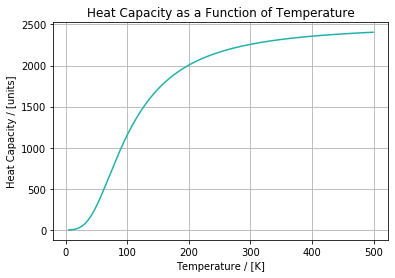

In [8]:
# 6: Newman 5.9 --- a) & b)

# necessary imports:

import numpy as np
from gaussxw import gaussxw
import matplotlib.pyplot as plt

# variable definitions:

T = np.arange(5, 500) # given value of T

V = 1e-3 # m^3 --- 1000 cm^3
rho = 6.022e28 # m^-3
theta = 428 # K
kb = 1.38064852e-23 # boltzmann constant, has blah units

N = 50 # number of sample points

# define function that is the integrand:

def f(x):
    return (x**4 * np.exp(x)) / (np.exp(x) - 1)**2

# define our cv(T) function:

def cv(T):
    
    # use gaussian quadrature to evaluate integral:
    
    a = 0.0
    b = theta / T
    
    x, w = gaussxw(N)
    
    xp = 0.5*(b-a)*x + 0.5*(b+a)
    wp = 0.5*(b-a)*w

    Int = 0.0 # intialize integral to 0
    
    for i in range(N):
        Int += wp[i] * f(xp[i])
    
    
    return 9*V*rho*kb* (T / theta)**3 * Int

C_vals = [] # create empty set to append cv values to

# calculate heat capacity values for given T:

for i in T:
    c2 = cv(i)
    
    C_vals.append(c2)
    
# plot heat capacity vs temperature:

plt.plot(T, C_vals, '-', color='lightseagreen')
plt.title('Heat Capacity as a Function of Temperature')
plt.xlabel('Temperature / [K]')
plt.ylabel('Heat Capacity / [units]')
plt.grid()
plt.show()

---

7. Newman 5.10: Period of an anharmonic oscillator <br>
$a)$ Derivation -- on paper! <br>
<br>
$b)$ Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude $a$ using Gaussian quadrature with $N = 20$ points, then use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. <br>
<br>
$c)$ You should find that the oscillator get faster as the amplitude increases, even though the particle has further to travel for larger amplitude. And you should find that the period diverges as the amplitude goes to zero. How do you explain these results?

/Users/michaelaallen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/Users/michaelaallen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


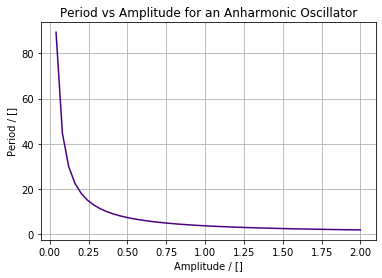

In [10]:
# 7: Newman 5.10 --- b)

# necessary imports:

import numpy as np
from gaussxw import gaussxwab 
import matplotlib.pyplot as plt

# define variables:

m = 1 # [] mass of particle

N = 20 # number of points
    
# define period function with integrand function nested:

def T(a):
    def f(x):
        def v(n):                            # we have to nest the defined integrand function like this since there is 
            return n**4                      # a v(a) in the integrand function
        
        return 1. / np.sqrt(v(a) - v(x))
    
    x, w = gaussxwab(N, 0, a)                # using gaussxwab instead of gaussxw to avoid confusion with 'a'
    
    Int = 0.0 # initialize integral to 0.0
    
    for i in range(N):
        Int += w[i] * f(x[i])
    
    return np.sqrt(8*m) * Int

# now use this function to calculate T_vals:

a = np.linspace(0, 2) # given range of amplitudes

T_vals = [] # empty set to append T values to

for i in a:
    t2 = T(i)
    
    T_vals.append(t2)
    
# plot period vs amplitude:

plt.plot(a, T_vals, '-', color='indigo')
plt.title('Period vs Amplitude for an Anharmonic Oscillator')
plt.xlabel('Amplitude / []')
plt.ylabel('Period / []')
plt.grid()
plt.show()

$c)$ The plot does indeed show that the period decreases as the amplitude increases. This can be explained because of 
the potential function, $V(x) = x^4$. As the amplitude increases, the period is going to drop off very quickly.

---

8. Newman 5.12: The Stefan-Boltzmann Constant <br>
<br>
$a)$ on paper! <br>
<br>
$b)$ Write a program to evaluate the integral in this expression. Explain what method you used, and how accurate you think your answer is. <br>
<br>
$c)$ Even before Planck gave his theory of thermal radiation around the turn of the 20th century, it was known that the total evergy $W$ given off by a black body per unit area per second followed Stefan's law: $W = \sigma T^4$, where $\sigma$ is the Stefan-Boltzmann constant. Use your value for the integral above to compute a value for the Stefan-Boltzmann constant (in SI units) to three significant figures. Check your result against the known value, which you can find in books or on-line. You should get good agreement.

In [11]:
# 8: Newman 5.12 --- b)

# necessary imports:

import numpy as np
from gaussxw import gaussxwab

# define  a function that is the integrand --- note that x = z / z - 1 because of bounds on integral:

def f(z):
    return (z / (1 - z))**3 / (np.exp(z / (1 - z)) - 1) * (1 / (1 - z)**2)

# I am going to use Gaussian Quadrature because this function is smooth, and GQ will be an easy, short code:

N = 100 # number of steps

x, w = gaussxwab(N, 0, 1)
Int = 0.0 # initialize integral to zero

for i in range(N):
    Int += w[i] * f(x[i])
    
print('Value of Integral =', Int)

Value of Integral = 6.493939402266831


/Users/michaelaallen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [12]:
# 8: Newman 5.12 --- c)

# define constants:

kb = 1.38064852e-23 # boltzmann constant [units]
pi = np.pi
c = 3e8 # speed of light [m/s]
h = 6.62607015e-34 # h [units]
h_bar = h / 2*pi
 
T = eval(input("Enter the temperature in Kelvin: ")) # lets the user input the temp they need

# use these constants and the integral value from part b to calculate W:

W = ((kb**4 * T**4) / (4 * pi**2 * c**2 * h_bar**3)) * Int

# use W and T to calculate sigma, stefan-boltzmann constant:

sigma = W / T**4

# define real value of sigma and calculate percent error between real and my value:

real_sigma = 5.670e-8 # [units]

percent_error = abs((real_sigma - sigma / real_sigma)) * 100

print('My value of the Stefan-Boltzmann Constant =', f'{sigma:.3}')  
print('Percent Error between my value and the real value =', f'{percent_error:.3}', '%')

Enter the temperature in Kelvin: 987
My value of the Stefan-Boltzmann Constant = 5.89e-11
Percent Error between my value and the real value = 0.104 %


 ---

9. Newman 5.14: Gravitational pull of a uniform sheet <br>
$a)$ on paper! <br>
<br>
$b)$ Write a program to calculate and plot the force as a function of $z$ from $z = 0$ to $z = 10$m. For the double integral use (double) Gaussian quadrature, as in Eq. (5.82), with 100 sample points along each axis. <br>
<br>
$c)$ You should see a smooth curve, except at very small values of $z$, where the force should drop off suddenly to zero. This drop is not a real effect, but an artifact of the way we have done the calculation. Explain briefly where this artifact comes from and suggest a strategy to remove it, or at least to decrease its size.

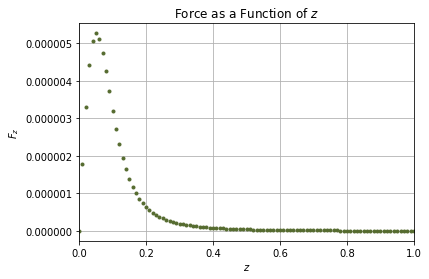

In [14]:
# 9: Newman 5.14 --- b)

# necessary imports:

import numpy as np
from gaussxw import gaussxwab
import matplotlib.pyplot as plt

# define constants and variables:

G = 6.674e-11 # gravitational constant [units]
sigma = 100 # mass per unit area [units]

N = 100 # number of sample points

# define function that is the integrand:

def f(x, y, z):
     return 1 / (x**2 + y**2 + z**2) ** 3/2

# define function to calculate Fz using double Gaussian quadrature:

def z_force(z):
    
    x, w = gaussxwab(N, -5, 5) # -5 to 5 from plot in book
    Int = 0.0 # initialize integral to zero
    
    for i in range(N):
        for j in range(N):
            Int += w[i] * w[j] * f(x[i], x[j], z)
    
    return G * sigma * z * Int

# define range of z values and calculate our Fz values:

z_vals = np.arange(0, 10, 0.01) # range of z values

z_force_vals = [] # empty set to append Fz values to

for i in z_vals:
    Fz = z_force(i)
    
    z_force_vals.append(Fz)

# plot the force as a function of z:    

plt.plot(z_vals, z_force_vals, '.', color='darkolivegreen')
plt.xlim(0, 1) # limit plot to better see the drop off around z = 0.1
plt.title('Force as a Function of $z$')
plt.xlabel('$z$')
plt.ylabel('$F_z$')
plt.grid()
plt.show()

$c)$ One way to diminish this artifact would be to include more points at very small $z$ (between 0.0 and 0.4). 



---